In [14]:
# import library
import pandas as pd
import matplotlib.pyplot as plt

# Summary Notebook
## Overall Approach
### 1. internal and external data collection
We collect the internal data, which is the property data from Domain by scraping. Then finding the external data, and downloads the data we need from different official website. (see readme for details)
### 2. data cleaning 
The main point in this step is to clean the internal and external datasets. Then merge the useful dataset together.
##### **For internal dataset**:
- Pick up the postcode for each property
- Get rent for each property (unit: per week) since some of used different unit like permonth
- Get floor number for each property
- Get bedroom number, bathroom number and number of car park for each property

In [15]:
# Here is the final cleaned dataframe
cleaned_property_df = pd.read_csv("../data/curated/cleaned_property_data.csv")
cleaned_property_df.head(3)

,index,address,rent,features,type,furnitured,pool,gym,coordinates,desc,postcode,floor,num_bed,num_bath,num_car_park,rent_weekly
0,0,1414/218-228 A'Beckett Street Melbourne VIC 3000,$400 Per Week,1 Bed1 Bath− Parking,Apartment / Unit / Flat,No,No,No,"[-37.8102832, 144.9566691]",South Melbourne Leasing,3000,14,1,1,0,400
1,1,11a/131 Lonsdale Sreet Melbourne VIC 3000,$350 per week,1 Bed1 Bath− Parking,Studio,Yes,No,No,"[-37.810779, 144.9685513]",Wimpie Santoso,3000,11,1,1,0,350
2,2,911/408 Lonsdale Street Melbourne VIC 3000,$330 per week,1 Bed1 Bath− Parking,Apartment / Unit / Flat,No,No,No,"[-37.8125979, 144.9604012]",Ender Gok,3000,9,1,1,0,330


##### **For external dataset**:
- Read in different external datasets
- Extract and rename the columns that we need
- Merge the dataset we need and drop the duplicates 

(above steps need to repeat for different external datasets)

In [16]:
# Here is the part of cleaned dataframe for external dataset
GNR_cleaned = pd.read_csv("../data/curated/GNR_cleaned.csv")
GNR_cleaned.head(3)

,PLACE_NAME,FEATURE,LONGITUDE,LATITUDE,geometry,suburb,postcode
0,MOUNT CLEAR SECONDARY COLLEGE,SECONDARY SCHOOL,143.8766,-37.607,POINT (2400824.055420277 2431949.3066944666),MOUNT CLEAR,3357.0
1,VIEWBANK COLLEGE,SECONDARY SCHOOL,145.0865,-37.741,POINT (2507631.5373240355 2417744.9461323526),VIEWBANK,3084.0
2,Yarram Secondary College - Devon North Campus,SECONDARY SCHOOL,146.6478,-38.519,POINT (2643730.207553347 2330161.818601803),DEVON NORTH,NaN


### 3. preprocessing
- Create the count table for GNR

In [17]:
# count table to check the number of different features in each suburb
count_table = pd.read_csv('../data/curated/count_table.csv')
count_table.head(3)

,suburb,SECONDARY SCHOOL,PRIMARY AND SECONDARY SCHOOL,PRIMARY SCHOOL,SHOPPING CENTRE,PARK,KINDERGARTEN,POST OFFICE,SPECIAL SCHOOL,CHILD CARE,...,COAST,GOLF COURSE,HELIPORT,AIRPORT,IRON ORE PROCESSOR,MILL/TIMBER OPERATIONS,BEACH,TRAIN STATION,TRAM STATION,BUS
0,MOUNT CLEAR,1,0,2,0,2,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,VIEWBANK,2,0,1,0,6,2,0,0,1,...,0,0,0,0,0,0,0,0,0,26
2,DEVON NORTH,1,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


- Merge the internal and external dataset together

In [18]:
# here is the final dataframe after merging 
property_df = pd.read_csv('../data/curated/property_GNR.csv')
property_df.head(3)

,address,rent_weekly,floor,suburb,postcode,type,furnitured,pool,gym,num_bed,...,TRAM STATION,BUS,Education,Commercial,Environment,Medication,Secrity,Industrial,Prison,Transportation
0,1414/218-228 A'Beckett Street Melbourne VIC 3000,400,14,MELBOURNE,3000,Apartment / Unit / Flat / Penhouse,0,0,0,1,...,127.0,54.0,20.0,14.0,23.0,3.0,2.0,0.0,0.0,184.0
1,11a/131 Lonsdale Sreet Melbourne VIC 3000,350,11,MELBOURNE,3000,Studio,1,0,0,1,...,127.0,54.0,20.0,14.0,23.0,3.0,2.0,0.0,0.0,184.0
2,911/408 Lonsdale Street Melbourne VIC 3000,330,9,MELBOURNE,3000,Apartment / Unit / Flat / Penhouse,0,0,0,1,...,127.0,54.0,20.0,14.0,23.0,3.0,2.0,0.0,0.0,184.0


- removing the outliers by calculating IQR
- calculate Distances Between Proerties and Features by OpenRouteService

In [19]:
# dataframe contains the cloest features and travel time for the cloest train station
property_df = pd.read_csv('../data/curated/data.csv')
property_df.head(3)

,address,rent_weekly,floor,suburb,postcode,type,furnitured,pool,gym,num_bed,...,cloest_HELIPORT,cloest_AIRPORT,cloest_IRON ORE PROCESSOR,cloest_MILL/TIMBER OPERATIONS,cloest_BEACH,cloest_TRAM STATION,cloest_BUS,cloest_TRAIN_STATION,cloest_TRAIN_STATION_duration,cloest_TRAIN_STATION_distance
0,1414/218-228 A'Beckett Street Melbourne VIC 3000,400,14,MELBOURNE,3000,Apartment / Unit / Flat / Penhouse,0,0,0,1,...,4602.243139,10572.425042,58968.064246,63924.811459,4924.342233,122.485883,37.427155,Flagstaff Railway Station (Melbourne City),41.4,282.0
1,11a/131 Lonsdale Sreet Melbourne VIC 3000,350,11,MELBOURNE,3000,Studio,1,0,0,1,...,5564.850055,11141.121440,59761.515319,63682.479322,5709.431207,195.490530,46.128039,Parliament Railway Station (Melbourne City),117.8,762.1
2,911/408 Lonsdale Street Melbourne VIC 3000,330,9,MELBOURNE,3000,Apartment / Unit / Flat / Penhouse,0,0,0,1,...,4821.362032,10953.719391,59069.898510,64077.037494,5011.485174,205.391048,21.831936,Melbourne Central Railway Station (Melbourne C...,69.9,515.3


### 4. feature engineering and selection
There are totally 9 algorithms to select top 15 features via linear correlations and features importance.

**Algorithms**
1. Pearson Correlation
2. Mutual Information
3. Chi-Squared
4. Recursive Feature Elimination
5. Embedded Method: Lasso regression
6. Embedded Method: Tree-based RandomForest
7. Lightgbm
8. Embedded Method: Tree-based Extra Trees
9. Embedded Method: Tree-based DecisionTree


In [20]:
# datafrme to show the most important internal and external features
feature_selection = pd.read_csv('../data/curated/feature_selection.csv')
feature_selection.head(20)

,Feature,Pearson,Chi-2,RFE,Logistics,Random Forest,LightGBM,MI,Extra Tree,DT,Total
0,pool,True,True,True,True,False,False,False,False,False,4
1,floor,True,False,False,False,True,False,False,True,True,4
2,cloest_SECONDARY SCHOOL,False,False,False,False,True,True,False,True,True,4
3,cloest_PRIMARY SCHOOL,False,False,False,False,True,True,False,True,True,4
4,cloest_PARK,False,False,False,False,True,True,False,True,True,4
5,cloest_KINDERGARTEN,False,False,False,False,True,True,False,True,True,4
6,cloest_CHILD CARE,False,False,False,False,True,True,False,True,True,4
7,cloest_BUS,False,False,True,False,True,True,False,False,True,4
8,suburb,False,False,False,True,False,False,True,False,True,3
9,furnitured,False,True,True,True,False,False,False,False,False,3


### 5. modelling
We totally use 3 models for modelling. 
- Random Forest model is used for training and predicting property weekly rent. 
- Simple linear regression (ordinary least square) is mainly used for training and predicting median income for each suburb, because the income data forms a linear relationship with time. So we assume the income only depends on the changes over time. 
- Auto-regression model is used for training and predicting median rent of each suburb. Since there is a strong correlation between two adjacent time steps, median rent data is suitable for auto-regression model. 


Comparing the prediction from each model, we use auto-regression as final model, and the result is showing below:

In [21]:
# Here is the final prediction for the weekly rent median
predict_rental = pd.read_csv("../data/curated/predict_rental_AutoReg.csv")
predict_rental.head(3)

,Mar_2000,Jun_2000,Sep_2000,Dec_2000,Mar_2001,Jun_2001,Sep_2001,Dec_2001,Mar_2002,Jun_2002,...,Dec_2025,Mar_2026,Jun_2026,Sep_2026,Dec_2026,Mar_2027,Jun_2027,Sep_2027,Dec_2027,suburb
0,175.0,180.0,180.0,180.0,180.0,185.0,190.0,195.0,200.0,200.0,...,472.206287,516.491418,474.643085,485.864002,503.440168,483.912978,488.385414,483.911503,484.547703,YARRAVILLE
1,145.0,145.0,150.0,150.0,150.0,150.0,150.0,150.0,150.0,155.0,...,328.045832,324.923760,334.097642,335.553168,336.187029,353.675407,331.858821,335.758787,345.086805,WODONGA
2,220.0,225.0,230.0,240.0,245.0,240.0,245.0,250.0,250.0,260.0,...,438.240129,445.039466,455.011112,461.676035,455.996250,450.615165,445.272220,429.647564,424.114145,WINDSOR


### 6. analyzing (answer 3 main questions)
**What are the most important internal and external features in predicting rental prices?**


Internal Feature: pool, floor,suburb,furnitured


External feature: distance to the closest secondary school, primary school, park, kindergarten,child care, bus stop


In [22]:
# datafrme to show the top 10 most important internal and external features
feature_selection = pd.read_csv('../data/curated/feature_selection.csv')
feature_selection.head(10)

,Feature,Pearson,Chi-2,RFE,Logistics,Random Forest,LightGBM,MI,Extra Tree,DT,Total
0,pool,True,True,True,True,False,False,False,False,False,4
1,floor,True,False,False,False,True,False,False,True,True,4
2,cloest_SECONDARY SCHOOL,False,False,False,False,True,True,False,True,True,4
3,cloest_PRIMARY SCHOOL,False,False,False,False,True,True,False,True,True,4
4,cloest_PARK,False,False,False,False,True,True,False,True,True,4
5,cloest_KINDERGARTEN,False,False,False,False,True,True,False,True,True,4
6,cloest_CHILD CARE,False,False,False,False,True,True,False,True,True,4
7,cloest_BUS,False,False,True,False,True,True,False,False,True,4
8,suburb,False,False,False,True,False,False,True,False,True,3
9,furnitured,False,True,True,True,False,False,False,False,False,3


**What are the top 10 suburbs with the highest predicted growth rate?**

In [23]:
rental_top_10_growth = pd.read_csv('../data/curated/growth_rate.csv')
rental_top_10_growth

,suburb,growth_rate_22-25
0,WANGARATTA,34.28%
1,HASTINGS,29.11%
2,FLINDERS,29.11%
3,LARA,27.83%
4,CARLTON,23.7%
5,PARKVILLE,23.7%
6,HERNE HILL,21.71%
7,GEELONG WEST,21.71%
8,CAMBERWELL,19.61%
9,GLEN IRIS,19.61%


**What are the most liveable and affordable suburbs according to your chosen metrics?**

(Three age groups have the same algorithm to find the most liveable and affordable suburbs)

For youth, Werribee, berwick and sunbury

For middle, Werribee, berwick and Frankston

For late, Werribee, berwick and sunbury

In [24]:
# here shows the datafrane for the most liveable suburbs for youth
livable = pd.read_csv('../data/curated/livable_youth.csv')
livable.head(15)

,suburb,livable,UNIVERSITY,Commercial,Environment,Medication,Secrity,Transportation,BUS,TRAM STATION,TRAIN STATION
0,MELBOURNE,22.30,0.0,14.0,23.0,3.0,2.0,184.0,54.0,127.0,3.0
1,RESERVOIR,17.75,0.0,1.0,9.0,2.0,1.0,317.0,302.0,11.0,4.0
2,FRANKSTON,14.40,0.0,3.0,24.0,4.0,1.0,217.0,215.0,0.0,2.0
3,PRESTON,14.20,0.0,4.0,4.0,3.0,2.0,207.0,165.0,40.0,2.0
4,WERRIBEE,14.10,1.0,1.0,18.0,4.0,1.0,229.0,227.0,0.0,2.0
5,CAMBERWELL,13.65,0.0,2.0,14.0,5.0,1.0,145.0,58.0,82.0,5.0
6,SUNBURY,13.50,0.0,2.0,14.0,1.0,1.0,228.0,227.0,0.0,1.0
7,BERWICK,13.10,0.0,2.0,18.0,3.0,1.0,210.0,209.0,0.0,1.0
8,MORNINGTON,12.20,0.0,2.0,62.0,1.0,1.0,106.0,106.0,0.0,0.0
9,COBURG,12.00,0.0,2.0,22.0,4.0,1.0,143.0,105.0,36.0,2.0


In [25]:
# list of top 15 most liveable suburbs for youth
suburb_lis = livable['suburb'].to_list()[:15]
suburb_lis

['MELBOURNE',
 'RESERVOIR',
 'FRANKSTON',
 'PRESTON',
 'WERRIBEE',
 'CAMBERWELL',
 'SUNBURY',
 'BERWICK',
 'MORNINGTON',
 'COBURG',
 'KEW',
 'CROYDON',
 'DANDENONG',
 'ST KILDA',
 'FOOTSCRAY']

/tmp/ipykernel_12190/906216088.py:45: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  median_suburb = property_df.groupby('suburb').agg('median')[['rent_weekly']].reset_index()


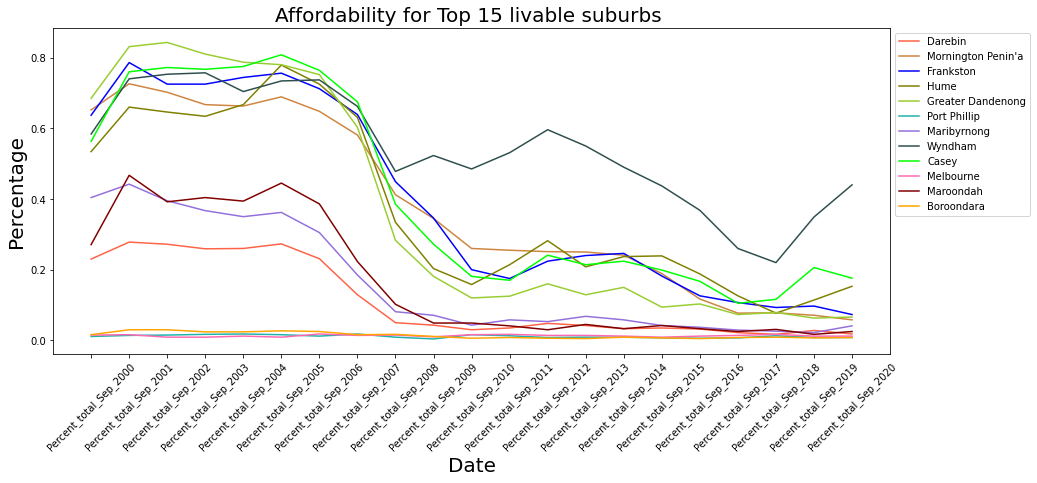

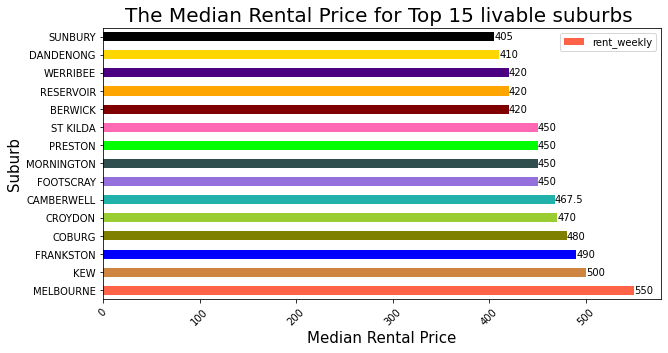

In [26]:
# plot the line chart of affordability and the bar chart of median rental price for top 15 suburbs
affordable = pd.read_csv('../data/curated/affordable.csv')
affordable = affordable[['LGA','Percent_total_Sep_2000', 'Percent_total_Sep_2001', 'Percent_total_Sep_2002', 
                         'Percent_total_Sep_2003', 'Percent_total_Sep_2004', 'Percent_total_Sep_2005', 
                         'Percent_total_Sep_2006', 'Percent_total_Sep_2007', 'Percent_total_Sep_2008', 
                         'Percent_total_Sep_2009', 'Percent_total_Sep_2010', 'Percent_total_Sep_2011', 
                         'Percent_total_Sep_2012', 'Percent_total_Sep_2013', 'Percent_total_Sep_2014', 
                         'Percent_total_Sep_2015', 'Percent_total_Sep_2016', 'Percent_total_Sep_2017', 
                         'Percent_total_Sep_2018', 'Percent_total_Sep_2019', 'Percent_total_Sep_2020', 
                         'Percent_total_Sep_2021']]

# suburb and corresponding locality
affordable_dict = {'MELBOURNE': 'Melbourne', 'RESERVOIR' :'Darebin', 'FRANKSTON' :'Frankston',
                   'PRESTON':'Darebin','WERRIBEE':'Wyndham','CAMBERWELL':'Boroondara','SUNBURY':'Hume',
                   'BERWICK':'Casey','MORNINGTON':"Mornington Penin'a",'COBURG':'Darebin',
                   'KEW':'Boroondara','CROYDON':'Maroondah','DANDENONG':'Greater Dandenong',
                   'ST KILDA':'Port Phillip','FOOTSCRAY':'Maribyrnong'}
#line plot for visualize Affordability for Top 15 livable suburbs
fig, ax = plt.subplots(figsize = (15,6))
plt.xlabel('Date', fontsize=20)
plt.ylabel('Percentage', fontsize=20)
plt.title('Affordability for Top 15 livable suburbs ', fontsize=20)

plt.xticks(rotation = 45)
colors=["tomato","peru","blue","olive","yellowgreen","lightseagreen","mediumpurple",
        "darkslategray","lime","hotpink","maroon",'orange', 'indigo','gold','black']
i = 0
LGA_lis = list(set(affordable_dict.values()))
# draw each suburb line
for suburb in LGA_lis:
    if affordable[affordable['LGA'] == suburb].shape[0] > 0:
        # filter suburb data
        df = affordable[affordable['LGA'] == suburb].copy().transpose().reset_index()
        df = df.drop([0])
        df = df.drop([df.shape[0]])
        df.columns =['Date', suburb]
        # draw line
        ax.plot(df['Date'], df[suburb], color = colors[i],linestyle = 'solid', label = suburb)
        #ax.annotate(str(round(df[suburb].iloc[-1],2)),(df['Date'].iloc[-1],df[suburb].iloc[-1]),ha='left')
        i+=1

plt.legend(bbox_to_anchor=(1.0, 1.0))

# calculate median rental price by property data
median_suburb = property_df.groupby('suburb').agg('median')[['rent_weekly']].reset_index()
# filter top 15 livable suburb
for suburb in list(median_suburb['suburb'].unique()):
    if suburb not in suburb_lis:
        median_suburb = median_suburb[median_suburb['suburb'] != suburb]
median_suburb = median_suburb.sort_values(by=['rent_weekly'], ascending=False)
#Bar char for visualize Median Rental Price for Top 15 livable suburbs by property data
fig = median_suburb.plot.barh(x="suburb", y="rent_weekly",figsize=(10,5),
                     color=["tomato","peru","blue","olive","yellowgreen","lightseagreen","mediumpurple","darkslategray","lime","hotpink","maroon",'orange', 'indigo','gold','black'])
plt.tick_params(axis='both', which='major', labelsize=10)
plt.tick_params(axis='both', which='minor', labelsize=10)
plt.xticks(rotation =45)
plt.ylabel('Suburb', fontsize=15)
plt.xlabel("Median Rental Price", fontsize=15)
plt.title("The Median Rental Price for Top 15 livable suburbs ", size=20)
fig.bar_label(fig.containers[0])
#plt.legend(loc='upper left', bbox_to_anchor=(1.0, 0.5))
plt.show()

### 7. recommendation
**For consumers**

We highly recommend Werribee, Berwick, Sunbury, Frankston. The suburbs are liveable for most people and the rental price is relatively low.  Consumers can have a comfortable and convenient living in VIC.


**For investors and Real Estate Companies**

we will recommend Melbourne, Camberwell, Coburg, and Croydon. Since the suburbs have developed commercial, high rental prices and growth rates and also great livability. So those suburbs are more likely to be profitable.

## Limitations/Assumptions

### **Limitation**
- Dimensions of the geographical are not matching
- No historical data of the rental property price for internal dataset
- External datasets are not updated due to the government statistical retardance

### **Assumption**
- Assume API keys are safe
- Assume internal feature has a liner relationship with the weekly rental price
- Assume income median has a linear relationship with the time and only depends on the change of the time

### **API-Restriction**
- Google map API - costly
- Open Route Service - Maximum 2000 requests per day
- Geopy - Low rate limit
- Security - API keys and token